In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bs4 import BeautifulSoup as soup 
import requests 
import re 
import time
import random 

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'} 
url = 'https://charlottesville.craigslist.org/search/charlottesville-va/bia?lat=38.048&lon=-78.467&purveyor=owner&search_distance=190#search=1~gallery~0~10' 
raw = requests.get(url,headers=header)


bike_types = ['mountain', 'kid', 'electric', 'beach', 'road', 'bmx']
colors = ['blue', 'red', 'black', 'white', 'silver', 'orange', 'yellow', 'purple', 'green', 'brown', 'pink']


bsObj = soup(raw.content,'html.parser') 
listings = bsObj.find_all(class_="cl-static-search-result") 

In [10]:
data = []
for k in range( len(listings) ):
    title = listings[k].find('div',class_='title').get_text().lower()
    price = listings[k].find('div',class_='price').get_text()
    link = listings[k].find(href=True)['href']
    words = title.split()
    hits_1 = [word for word in words if word in bike_types]
    if len(hits_1) == 0:
        type = 'missing'
    else:
        type = hits_1[0]
    hits_2 = [word for word in words if word in colors]
    if len(hits_2) == 0:
        color = 'missing'
    else:
        color = hits_2[0]
    regex_search = re.search(r'20[0-9][0-9]|19[0-9][0-9]', title )
    if regex_search is None: 
        year = np.nan 
    else:
        year = regex_search.group(0)
    
    data.append({'title':title,'price':price,'year':year,'link':link,'type':type, 'color':color})

In [11]:
df = pd.DataFrame.from_dict(data)
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df['year'] = pd.to_numeric(df['year'],errors='coerce')
df['age'] = 2025-df['year']
print(df.shape)
df.to_csv('craigslist_bikes.csv')
df.head()

(350, 7)


,title,price,year,link,type,color,age
0,vintage 60s raleigh colt bike,35,NaN,https://baltimore.craigslist.org/bik/d/baltimo...,missing,missing,NaN
1,tulsa huffy navy blue bike,15,NaN,https://baltimore.craigslist.org/bik/d/baltimo...,missing,blue,NaN
2,roadmaster mt sport sx 18 speed torque drive bike,20,NaN,https://baltimore.craigslist.org/bik/d/baltimo...,missing,missing,NaN
3,fuji espree vintage 80s touring bike,35,NaN,https://baltimore.craigslist.org/bik/d/baltimo...,missing,missing,NaN
4,huffy ultima 10 speed bike,15,NaN,https://baltimore.craigslist.org/bik/d/baltimo...,missing,missing,NaN


count     350.000000
mean      330.102857
std       510.336594
min         0.000000
25%        75.000000
50%       175.000000
75%       325.000000
max      3990.000000
Name: price, dtype: float64


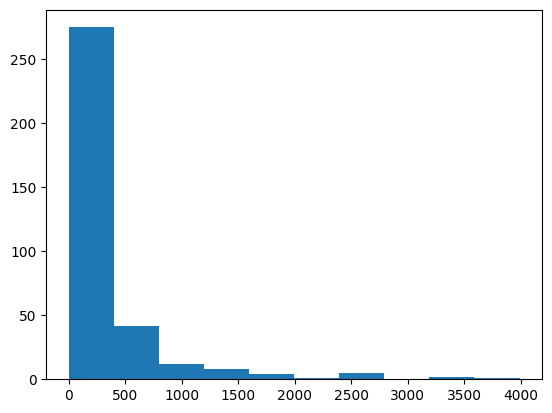

count    29.000000
mean     27.586207
std      26.276711
min       1.000000
25%       4.000000
50%      18.000000
75%      45.000000
max      85.000000
Name: age, dtype: float64


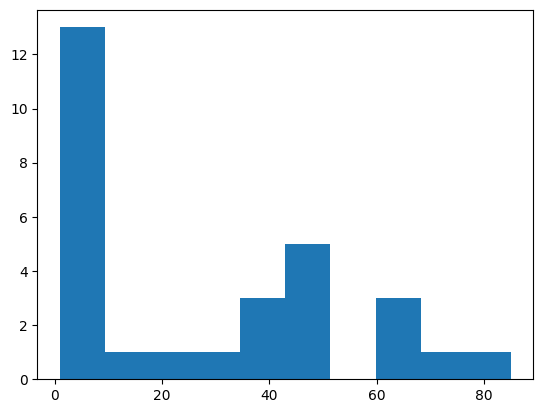

In [12]:
print(df['price'].describe())
df['price'].hist(grid=False)
plt.show()
print(df['age'].describe())
df['age'].hist(grid=False)
plt.show()

In [13]:
df.loc[:,['price','type']].groupby('type').describe()

price                                                              
          count        mean         std    min     25%    50%     75%     max
type                                                                         
beach       8.0  156.125000  100.221808   45.0   76.25  159.5  200.00   350.0
bmx        13.0  405.384615  636.296123   60.0  110.00  210.0  250.00  2400.0
electric    7.0  574.142857  443.702388  169.0  272.50  280.0  837.50  1350.0
kid         1.0   45.000000         NaN   45.0   45.00   45.0   45.00    45.0
missing   263.0  319.825095  525.688781    0.0   60.00  160.0  310.00  3990.0
mountain   30.0  240.500000  442.661134   45.0   76.25  100.0  178.75  2400.0
road       28.0  486.571429  427.340044   65.0  213.75  362.5  675.00  1800.0

In [14]:
df.loc[:,['age','type']].groupby('type').describe()

age                                                     
         count       mean        std   min    25%   50%   75%   max
type                                                               
beach      0.0        NaN        NaN   NaN    NaN   NaN   NaN   NaN
bmx        4.0  21.750000  22.500000   1.0   3.25  20.5  39.0  45.0
electric   0.0        NaN        NaN   NaN    NaN   NaN   NaN   NaN
kid        0.0        NaN        NaN   NaN    NaN   NaN   NaN   NaN
missing   23.0  27.782609  28.100399   1.0   4.00  15.0  45.0  85.0
mountain   1.0  45.000000        NaN  45.0  45.00  45.0  45.0  45.0
road       1.0  29.000000        NaN  29.0  29.00  29.0  29.0  29.0

In [15]:
df.loc[ df['type']=='bmx',:]

,title,price,year,link,type,color,age
19,"20"" haro midway bmx bike",250,NaN,https://norfolk.craigslist.org/bik/d/chesapeak...,bmx,missing,NaN
20,"20"" cult gateway bmx bike",250,NaN,https://norfolk.craigslist.org/bik/d/chesapeak...,bmx,missing,NaN
38,mongoose 20” bmx bicycle,110,NaN,https://lancaster.craigslist.org/bik/d/lancast...,bmx,missing,NaN
62,nice 20” bronco bmx bike,60,NaN,https://raleigh.craigslist.org/bik/d/cary-nice...,bmx,missing,NaN
76,2024 hyper wizard custom bmx build,2400,2024.0,https://charlottesville.craigslist.org/bik/d/c...,bmx,missing,1.0
115,vintage 1988 gt freestyle bmx,900,1988.0,https://washingtondc.craigslist.org/nva/bik/d/...,bmx,missing,37.0
121,mongoose mode 180 bmx freestyle bike $250 new ...,65,NaN,https://york.craigslist.org/bik/d/york-mongoos...,bmx,missing,NaN
138,"1980s kent ambush bmx bicycle, 20 inch bike",325,1980.0,https://york.craigslist.org/bik/d/york-1980s-k...,bmx,missing,45.0
195,"29"" r4 limited edition bmx mag alloy wheels",210,NaN,https://norfolk.craigslist.org/bik/d/chesapeak...,bmx,missing,NaN
198,schwinn aerostar * bmx * fully serviced,100,NaN,https://raleigh.craigslist.org/bik/d/raleigh-s...,bmx,missing,NaN


<Axes: xlabel='age', ylabel='price'>

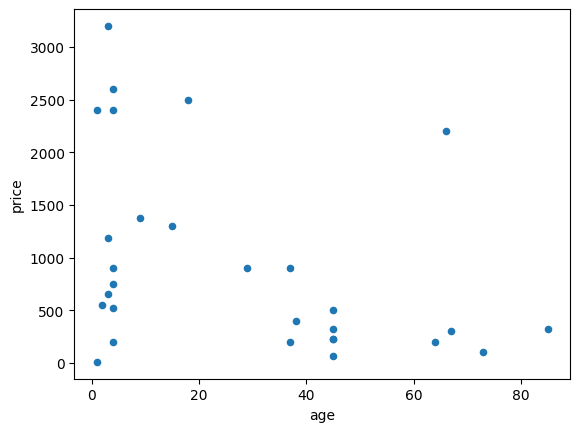

In [16]:
df.plot.scatter('age','price')

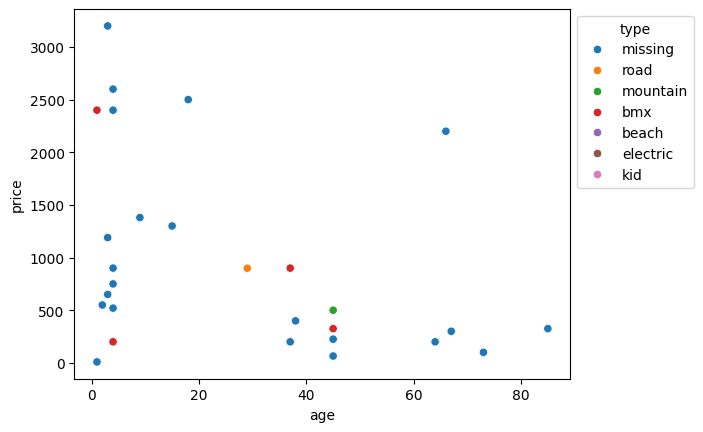

In [19]:
ax = sns.scatterplot(data=df, x='age', y='price',hue='type')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

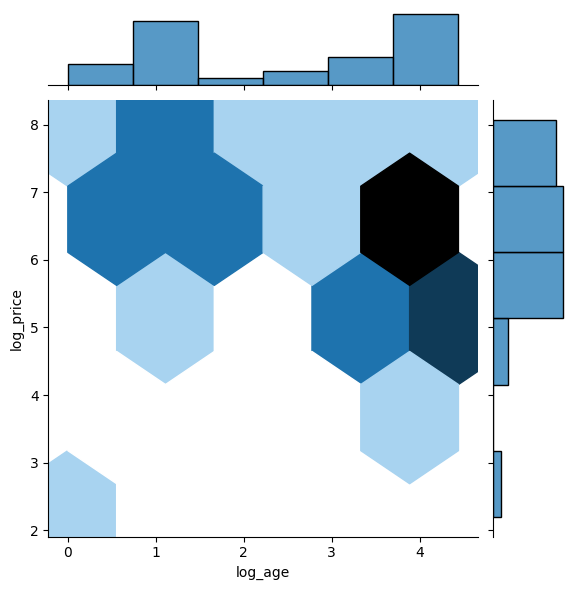

In [21]:
sns.jointplot(data=df, x='log_age', y='log_price',kind='hex')

If there is anything we can learn from this analyzation, it is definitely that not enough craigslist users are putting in the complete information about the bikes! A lot of missing data when it comes to type and color. That being said, We can see there is a negative correlation with price and age. This is expected, as age increases the price would most likely decrease unless the bike is a vintage or collectible item. There are surprisingly a good amount of bikes 40-60 years old. We may want to look further into this, but that also makes sense as those are likely the bikes people would want to sell of instead of keep. The pricing range isn't as wide as I figured. I know some bikes can get really expensive. We can see the BMX category is more expensive, which could be good to know if trying to sell for profit. 